In [124]:
import pandas as pd
import numpy as np
import mysql.connector
from mysql.connector import Error
from datetime import datetime
import env
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
def run_query(sql_name):
    # Connect to the MySQL database (replace the placeholders with your actual credentials)
    host = env.db_host
    user = env.db_user
    password = env.db_password
    database = env.db_schema
    port = 33144

    # Create a connection to the database
    connection = mysql.connector.connect(host=host, user=user, password=password, database=database, port=port)

    # Create a cursor object to execute the SQL query
    cursor = connection.cursor()

    # Define the SQL query
    current_dir = f"./"
    file_path = f'{current_dir}{sql_name}'

    # Read the content of the file into a variable
    with open(file_path, 'r') as file:
        query = file.read()

    # Execute the query
    cursor.execute(query)

    # Fetch all the results into a list of tuples
    results = cursor.fetchall()

    # Get the column names from the cursor description
    columns = [col[0] for col in cursor.description]

    # Close the cursor and the connection
    cursor.close()
    connection.close()

    # Create a DataFrame from the results and column names
    df = pd.DataFrame(results, columns=columns)
    return df

In [126]:
# mager maka auto hapus yg korelasi tinggi
def remove_highly_correlated_features(df, threshold=0.9):
    """
    Menghapus fitur yang memiliki korelasi lebih dari ambang batas tertentu.
    
    Parameters:
    - df: DataFrame yang berisi fitur-fitur yang akan diperiksa.
    - threshold: Ambang batas korelasi.
    
    Returns:
    - DataFrame yang telah dikurangi fiturnya.
    """
    # Hanya mengambil kolom numerik untuk korelasi
    numeric_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr().abs()
    
    # Dapatkan matriks segitiga atas dari matriks korelasi
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    #print(f"kolom dengan korelasi di atas {threshold}: {upper_triangle.columns}")
    
    # Temukan indeks kolom fitur yang memiliki korelasi lebih dari ambang batas
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    return df.drop(columns=to_drop)

In [127]:
def manual_oversample(X, y):
    # Dapatkan indeks dari kelas minoritas
    minority_class_indices = y[y == 1].index
    majority_class_indices = y[y == 0].index
    
    # Hitung jumlah kelas mayoritas
    num_majority = len(y[y == 0])
    
    # Dapatkan sampel acak dari kelas minoritas
    random_minority_indices = np.random.choice(minority_class_indices, num_majority, replace=True)
    
    # Gabungkan indeks kelas mayoritas dengan sampel acak dari kelas minoritas
    over_sample_indices = np.concatenate([majority_class_indices, random_minority_indices])
    
    # Dapatkan data yang oversampled
    X_oversampled = X.loc[over_sample_indices]
    y_oversampled = y.loc[over_sample_indices]
    
    return X_oversampled, y_oversampled

In [128]:
# download dataset
# download_df = run_query("queries/DATASET_INSTALLMENT_PAYMENT_MIN.sql")
# print("downloading...")
# download_df.set_index(['reco_id_curr'], inplace=True)
# print("generate csv...")
# download_df.to_csv("dataset/DATASET_INSTALLMENT_PAYMENT_MIN.csv")

# download_df = run_query("queries/DATASET_INSTALLMENT_PAYMENT_MAX.sql")
# print("downloading...")
# download_df.set_index(['reco_id_curr'], inplace=True)
# print("generate csv...")
# download_df.to_csv("dataset/DATASET_INSTALLMENT_PAYMENT_MAX.csv")

# download_df = run_query("test_queries/PREDICTION_BKI_BALANCE.sql")
# print("downloading...")
# #download_df.set_index(['reco_id_curr'], inplace=True)
# print("generate csv...")
# download_df.to_csv("prediction/PREDICTION_BKI_BALANCE.csv")

In [534]:
# credit appication
cred_app_df = pd.read_csv('dataset/DATASET_CREDIT_APPLICATION.csv')
cred_app_df = cred_app_df[['reco_id_curr',
 'contract_type_name',
 'gender',
 'own_car_flag',
 'own_realty_flag',
 'children_count',
 'income',
 'loan_body',
 'annuity_payment',
 'goods_price',
 'type_suite_name',
 'income_type_name',
 'education_type_name',
 'family_status_name',
 'housing_type_name',
 'population_relative_region',
 'days_birth',
 'days_employed',
 'registration_timestamp',
 'publication_timestamp',
 'age_own_car',
 'mobile_flag',
 'employee_phone_flag',
#  'work_phone_flag',
 'mobile_contact_flag',
 'phone_flag',
#  'email_flag',
 'type_of_occupation',
 'family_members__count',
 'rating_client_region',
 'rating_client_w_city_region',
#  'start_weekday_appr_process',
#  'hour_of_approval_process_start',
#  'not_live_region_reg_region',
#  'not_work_region_reg_region',
#  'living_region_not_work_region_flag',
#  'not_live_city_reg_city',
#  'not_work_city_reg_city',
#  'living_city_not_work_city_flag',
#  'type_of_organization',
 'external_source_1',
 'external_source_2',
 'external_source_3',
 'average_apartments',
 'average_basementarea',
 'average_years_beginexpluatation',
 'average_years_building',
 'average_commonarea',
 'average_elevator_count',
 'average_entrance_count',
 'average_max_floors',
 'average_min_floors',
 'average_land_area',
 'average_living_apartments',
 'average_living_area',
 'non_living_apartments_av',
 'non_living_area_avg',
 'mode_apartments',
 'mode_basementarea',
 'mode_years_beginexpluatation',
 'mode_years_building',
#  'mode_commonarea',
#  'mode_elevator_count',
#  'mode_entrance_count',
#  'mode_max_floors',
#  'mode_min_floors',
 'mode_land_area',
#  'mode_living_apartments',
#  'mode_living_area',
#  'non_living_apartments_mode',
#  'non_living_area_mode',
 'median_apartments',
 'median_basementarea',
 'median_years_beginexpluatation',
 'median_years_building',
 'median_commonarea',
 'median_elevator_count',
 'median_entrance_count',
 'median_max_floors',
 'median_min_floors',
 'median_land_area',
 'median_living_apartments',
 'median_living_area',
#  'non_living_apartments_medi',
#  'non_living_area_medi',
#  'fondkapremon_mode',
 'mode_house_type',
 'mode_total_area',
 'mode_walls_material',
 'emergency_state_mode',
 'observes_30_count_social_circle',
 'social_circle_defaults_30_days',
 'observes_60_count_social_circle',
 'social_circle_defaults_60_days',
 'last_phone_number_change',
 'document_2_flag',
 'document_3_flag',
#  'document_4_flag',
#  'document_5_flag',
#  'document_6_flag',
#  'document_7_flag',
#  'document_8_flag',
#  'document_9_flag',
#  'document_10_flag',
#  'document_11_flag',
#  'document_12_flag',
#  'document_13_flag',
#  'document_14_flag',
#  'document_15_flag',
#  'document_16_flag',
#  'document_17_flag',
#  'document_18_flag',
#  'document_19_flag',
#  'document_20_flag',
#  'document_21_flag',
#  'requests_bki_hour',
#  'requests_bki_day',
#  'requests_bki_week',
#  'requests_bki_month',
 'requests_bki_qrt',
 'requests_bki_year'
 ]].copy()

In [546]:
# credit appication
cred_app_df = pd.read_csv('dataset/DATASET_CREDIT_APPLICATION.csv')
target_df = pd.read_csv('dataset/DATASET_TARGET.csv')
# add TARGET
gabung_df = cred_app_df.merge(target_df, on='reco_id_curr', how='left')

# add BKI
bki_df = pd.read_csv('dataset/DATASET_BKI.csv')
gabung_df = gabung_df.merge(bki_df, on='reco_id_curr', how='left')

# add BKI BALANCE
bki_balance_df = pd.read_csv('dataset/DATASET_BKI_BALANCE.csv')
gabung_df = gabung_df.merge(bki_balance_df, on='reco_bureau_id', how='left')

# add CASH BALANCE MIN
cash_balance_min_df = pd.read_csv('dataset/DATASET_CASH_BALANCE_MIN.csv')
gabung_df = gabung_df.merge(cash_balance_min_df, on='reco_id_curr', how='left')
# add CASH BALANCE MAX
cash_balance_max_df = pd.read_csv('dataset/DATASET_CASH_BALANCE_MAX.csv')
gabung_df = gabung_df.merge(cash_balance_max_df, on='reco_id_curr', how='left')

# add CRED BALANCE MIN
cred_balance_min_df = pd.read_csv('dataset/DATASET_CREDIT_BALANCE_MIN.csv')
gabung_df = gabung_df.merge(cred_balance_min_df, on='reco_id_curr', how='left')
# add CRED BALANCE MAX
cred_balance_max_df = pd.read_csv('dataset/DATASET_CREDIT_BALANCE_MAX.csv')
gabung_df = gabung_df.merge(cred_balance_max_df, on='reco_id_curr', how='left')

# add INSTALLMENT PAYMENT MIN
install_payment_min_df = pd.read_csv('dataset/DATASET_INSTALLMENT_PAYMENT_MIN.csv')
gabung_df = gabung_df.merge(install_payment_min_df, on='reco_id_curr', how='left')
# add INSTALLMENT PAYMENT MAC
install_payment_max_df = pd.read_csv('dataset/DATASET_INSTALLMENT_PAYMENT_MAX.csv')
gabung_df = gabung_df.merge(install_payment_max_df, on='reco_id_curr', how='left')

# add PREVIOUS_LOAN_AVG
prev_load_df = pd.read_csv('dataset/DATASET_PREVIOUS_LOAN_AVG.csv')
gabung_df = gabung_df.merge(prev_load_df, on='reco_id_curr', how='left')

gabung_df.set_index(['reco_id_curr'], inplace=True)

In [547]:
class_counts = gabung_df['target'].value_counts()
print(class_counts)

0    88434
1     7530
Name: target, dtype: int64


<Axes: title={'center': 'Strange Distribution of Days Employed > Days Birth'}, xlabel='days_employed', ylabel='days_birth'>

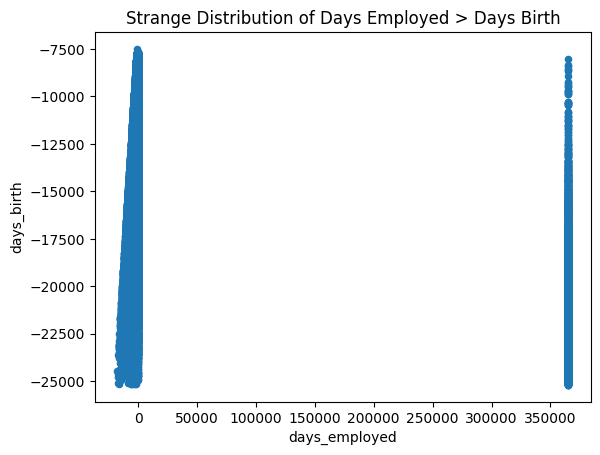

In [548]:
gabung_df.plot(kind='scatter', x='days_employed', y='days_birth', title='Strange Distribution of Days Employed > Days Birth')

In [549]:
# from sklearn.impute import KNNImputer

# # handling outlier
# gabung_df.loc[gabung_df['days_employed'] > 0, 'days_employed'] = np.nan

# # Inisialisasi KNNImputer
# knn_imputer = KNNImputer(n_neighbors=5)

# # Mengisi missing values untuk fitur numerik dengan KNNImputer
# df_numeric = gabung_df.select_dtypes(include=['int64'])
# gabung_df[df_numeric.columns] = knn_imputer.fit_transform(df_numeric)
# gabung_df.plot(kind='scatter', x='days_employed', y='days_birth')


# days_employed only
# from sklearn.impute import KNNImputer
# import numpy as np

# # handling outlier
# gabung_df.loc[gabung_df['days_employed'] > 0, 'days_employed'] = np.nan

# # Inisialisasi KNNImputer
# knn_imputer = KNNImputer(n_neighbors=5)

# # Mengisi missing values hanya untuk kolom 'income' dengan KNNImputer
# income_imputed = knn_imputer.fit_transform(gabung_df[['days_employed']])
# gabung_df['days_employed'] = income_imputed

# gabung_df.plot(kind='scatter', x='days_employed', y='days_birth')


In [550]:
gabung_df.drop(gabung_df.filter(regex='Unnamed').columns, axis=1, inplace=True)
gabung_df.drop(gabung_df.filter(regex='reco_bureau_id').columns, axis=1, inplace=True)
gabung_df.drop(gabung_df.filter(regex='reco_id_last').columns, axis=1, inplace=True)
gabung_df.drop(gabung_df[gabung_df['gender'] == 'XNA'].index, inplace=True)
# gabung_df.drop(gabung_df[gabung_df['income'] >= 700000].index, inplace=True)
# gabung_df.drop(gabung_df[gabung_df['days_employed'] > 0].index, inplace=True)
gabung_df.drop(columns=['days_employed'], inplace=True)
gabung_df.drop(columns=['income'], inplace=True)

gabung_df.drop(gabung_df[gabung_df['requests_bki_year'] > 10].index, inplace=True)
gabung_df.drop(gabung_df[gabung_df['children_count'] > 11].index, inplace=True)

reduced_df = remove_highly_correlated_features(gabung_df)
print(gabung_df.shape)
print(reduced_df.shape)

(95908, 203)
(95908, 137)


<Axes: xlabel='children_count', ylabel='requests_bki_year'>

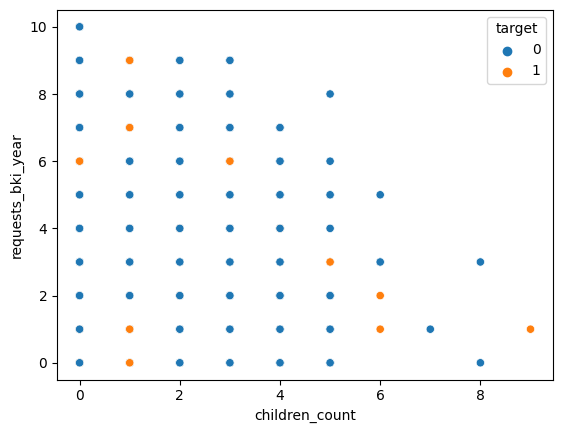

In [551]:
sns.scatterplot(x='children_count', y='requests_bki_year', hue='target', data=gabung_df)

In [552]:
# gabung_df.drop(gabung_df[gabung_df['income'] >= 1000000].index, inplace=True)
# sns.scatterplot(x='children_count', y='income', hue='target', data=gabung_df)

In [553]:
with open('na_columns.csv', 'w') as f:
    f.write(f'column, na_count\n')
    for col in gabung_df.columns:
        f.write(f"{col}, {gabung_df[col].isna().sum()}\n")
    f.close()

In [554]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib
from sklearn.impute import KNNImputer

# pilihan df   
df = gabung_df.copy()

# # Inisialisasi KNNImputer
# knn_imputer = KNNImputer(n_neighbors=5)

# # Mengisi missing values untuk fitur numerik dengan KNNImputer
# df_numeric = df.select_dtypes(include=['float64'])
# df[df_numeric.columns] = knn_imputer.fit_transform(df_numeric)

# Mengisi missing values numerik
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Mengisi missing values untuk fitur kategorikal dengan modus
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding kolom kategorikal
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split Train vs Test Data
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_train_resampled, y_train_resampled = manual_oversample(X_train_df, y_train)

In [555]:
# Pelatihan model LightGBM
import lightgbm as lgb

# Pelatihan model LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_pred_prob_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_prob_lgb)
report_lgb = classification_report(y_test, y_pred_lgb)

print(f"\nLightGBM Results:")
print(f"Accuracy Score: {accuracy_lgb:.4f}")
print("Classification Report:\n", report_lgb)
print(f"ROC AUC Score: {roc_auc_lgb:.4f}")
joblib.dump(lgb_model, 'LightGBM_model.pkl')

[LightGBM] [Info] Number of positive: 70752, number of negative: 70752
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23971
[LightGBM] [Info] Number of data points in the train set: 141504, number of used features: 195
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Results:
Accuracy Score: 0.7464
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85     17631
           1       0.19      0.64      0.29      1551

    accuracy                           0.75     19182
   macro avg       0.57      0.70      0.57     19182
weighted avg       0.90      0.75      0.80     19182

ROC AUC Score: 0.7645


['LightGBM_model.pkl']

In [556]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

# Prediksi dengan kelas
y_pred = lr.predict(X_test_scaled)

# Prediksi dengan probabilitas
y_pred_prob = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.4f}")
print("Classification Report:\n", report)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Menyimpan model, scaler, dan encoders
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'data_scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

Accuracy Score: 0.6868
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     17631
           1       0.16      0.69      0.26      1551

    accuracy                           0.69     19182
   macro avg       0.56      0.69      0.53     19182
weighted avg       0.90      0.69      0.76     19182

ROC AUC Score: 0.7497


/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


['label_encoders.pkl']

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Asumsikan Anda memiliki dataframe `df` yang siap untuk diproses
df = gabung_df.copy()

# Mengisi missing values numerik
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Mengisi missing values untuk fitur kategorikal dengan modus
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding kolom kategorikal
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data menjadi training dan validation
X_full = df.drop("target", axis=1)
y_full = df["target"]
X_train_full, X_val, y_train_full, y_val = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_val_scaled = scaler.transform(X_val)

# Inisialisasi Logistic Regression dengan bobot seimbang
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Training model
lr.fit(X_train_scaled, y_train_full)

# Evaluasi performa pada validation set
y_val_pred = lr.predict_proba(X_val_scaled)[:,1]
roc_auc = roc_auc_score(y_val, y_val_pred)
print("ROC AUC on Validation set:", roc_auc)

ROC AUC on Validation set: 0.7486632472053607


In [122]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback

class roc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x)
        roc = roc_auc_score(self.y, y_pred)
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print('\rroc-auc: %s - roc-auc_val: %s' % (str(round(roc,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

def create_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

model = create_model(X_train_resampled.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test_scaled, y_test),
                    epochs=100, batch_size=32, callbacks=[early_stopping, roc_callback(training_data=(X_train_resampled, y_train_resampled),validation_data=(X_test_scaled, y_test))])


Epoch 1/100
600/600 [==============================] - 0s 412us/step
roc-auc: 0.7586 - roc-auc_val: 0.7394                                                                                                    
4421/4421 [==============================] - 8s 2ms/step - loss: 0.6498 - accuracy: 0.6433 - val_loss: 0.5789 - val_accuracy: 0.6982
Epoch 2/100
600/600 [==============================] - 0s 438us/step
roc-auc: 0.7729 - roc-auc_val: 0.7432                                                                                                    
4421/4421 [==============================] - 7s 2ms/step - loss: 0.6004 - accuracy: 0.6840 - val_loss: 0.5946 - val_accuracy: 0.6635
Epoch 3/100
600/600 [==============================] - 0s 398us/step
roc-auc: 0.785 - roc-auc_val: 0.7399                                                                                                    
4421/4421 [==============================] - 7s 2ms/step - loss: 0.5903 - accuracy: 0.6925 - val_loss: 0.5696 - va

In [123]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Data Preparation
# (Asumsikan Anda telah mempersiapkan data Anda seperti pada kode sebelumnya)

# ... [Kode persiapan data Anda] ...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Membangun model dengan TensorFlow
n_features = X_train_scaled.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_features,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluasi Model
y_pred = model.predict(X_test_scaled)
roc_score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_score:.4f}")


Epoch 1/10
1919/1919 [==============================] - 2s 793us/step - loss: 0.2626 - accuracy: 0.9212 - val_loss: 0.2559 - val_accuracy: 0.9211
Epoch 2/10
1919/1919 [==============================] - 1s 729us/step - loss: 0.2504 - accuracy: 0.9215 - val_loss: 0.2545 - val_accuracy: 0.9212
Epoch 3/10
1919/1919 [==============================] - 1s 724us/step - loss: 0.2467 - accuracy: 0.9216 - val_loss: 0.2529 - val_accuracy: 0.9212
Epoch 4/10
1919/1919 [==============================] - 1s 725us/step - loss: 0.2432 - accuracy: 0.9217 - val_loss: 0.2556 - val_accuracy: 0.9211
Epoch 5/10
1919/1919 [==============================] - 1s 730us/step - loss: 0.2410 - accuracy: 0.9218 - val_loss: 0.2545 - val_accuracy: 0.9210
Epoch 6/10
1919/1919 [==============================] - 1s 732us/step - loss: 0.2387 - accuracy: 0.9223 - val_loss: 0.2571 - val_accuracy: 0.9205
Epoch 7/10
1919/1919 [==============================] - 1s 729us/step - loss: 0.2350 - accuracy: 0.9224 - val_loss: 0.2592 -

In [92]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Prediksi dengan kelas
y_pred_rf = rf.predict(X_test_scaled)

# Prediksi dengan probabilitas
y_pred_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"\nRandom Forest Results:")
print(f"Accuracy Score: {accuracy_rf:.4f}")
print("Classification Report:\n", report_rf)
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

# Menyimpan model RandomForest
joblib.dump(rf, 'random_forest_model.pkl')

/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Random Forest Results:
Accuracy Score: 0.9218
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     17681
         1.0       0.57      0.02      0.03      1506

    accuracy                           0.92     19187
   macro avg       0.75      0.51      0.50     19187
weighted avg       0.90      0.92      0.89     19187

ROC AUC Score: 0.7289


['random_forest_model.pkl']

In [93]:
# Pelatihan model XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"\nXGBoost Results:")
print(f"Accuracy Score: {accuracy_xgb:.4f}")
print("Classification Report:\n", report_xgb)
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")

# Menyimpan model RandomForest
joblib.dump(rf, 'xgboost_model.pkl')


XGBoost Results:
Accuracy Score: 0.7933
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.82      0.88     17681
         1.0       0.19      0.51      0.28      1506

    accuracy                           0.79     19187
   macro avg       0.57      0.66      0.58     19187
weighted avg       0.89      0.79      0.83     19187

ROC AUC Score: 0.7325


['xgboost_model.pkl']

## Prediction Data

#### download data to predict

In [214]:
# download prediction data
queries = ['PREDICTION_CREDIT_APPLICATION','PREDICTION_BKI_BALANCE', 'PREDICTION_BKI', 
'PREDICTION_CASH_BALANCE_MIN', 'PREDICTION_CASH_BALANCE_MAX', 'PREDICTION_CREDIT_BALANCE_MIN', 'PREDICTION_CREDIT_BALANCE_MAX',
'PREDICTION_INSTALLMENT_PAYMENT_MAX', 'PREDICTION_INSTALLMENT_PAYMENT_MIN', 'PREDICTION_PREVIOUS_LOAN_AVG']

indexes = ['reco_id_curr', 'reco_bureau_id', 'reco_id_last']

for quer in queries:
    download_df = run_query(f"test_queries/{quer}.sql")
    print(f"data rows {quer}: {len(download_df)}")
    # for idx in indexes:
    #     if idx in download_df.columns:
    #         download_df.set_index([idx], inplace=True)
    download_df.to_csv(f"prediction/{quer}.csv")
    print(f"{quer} csv generated!\n")

downloading PREDICTION_CREDIT_APPLICATION...
data rows PREDICTION_CREDIT_APPLICATION: 1000
PREDICTION_CREDIT_APPLICATION csv generated!

downloading PREDICTION_BKI_BALANCE...
data rows PREDICTION_BKI_BALANCE: 1346
PREDICTION_BKI_BALANCE csv generated!

downloading PREDICTION_BKI...
data rows PREDICTION_BKI: 1000
PREDICTION_BKI csv generated!

downloading PREDICTION_CASH_BALANCE_MIN...
data rows PREDICTION_CASH_BALANCE_MIN: 675
PREDICTION_CASH_BALANCE_MIN csv generated!

downloading PREDICTION_CASH_BALANCE_MAX...
data rows PREDICTION_CASH_BALANCE_MAX: 675
PREDICTION_CASH_BALANCE_MAX csv generated!

downloading PREDICTION_CREDIT_BALANCE_MIN...
data rows PREDICTION_CREDIT_BALANCE_MIN: 312
PREDICTION_CREDIT_BALANCE_MIN csv generated!

downloading PREDICTION_CREDIT_BALANCE_MAX...
data rows PREDICTION_CREDIT_BALANCE_MAX: 312
PREDICTION_CREDIT_BALANCE_MAX csv generated!

downloading PREDICTION_INSTALLMENT_PAYMENT_MAX...
data rows PREDICTION_INSTALLMENT_PAYMENT_MAX: 144
PREDICTION_INSTALLMENT_

In [568]:
# credit appication
cred_app_df = pd.read_csv('prediction/PREDICTION_CREDIT_APPLICATION.csv')
cred_app_df = cred_app_df[['reco_id_curr',
 'contract_type_name',
 'gender',
 'own_car_flag',
 'own_realty_flag',
 'children_count',
 'income',
 'loan_body',
 'annuity_payment',
 'goods_price',
 'type_suite_name',
 'income_type_name',
 'education_type_name',
 'family_status_name',
 'housing_type_name',
 'population_relative_region',
 'days_birth',
 'days_employed',
 'registration_timestamp',
 'publication_timestamp',
 'age_own_car',
 'mobile_flag',
 'employee_phone_flag',
#  'work_phone_flag',
 'mobile_contact_flag',
 'phone_flag',
#  'email_flag',
 'type_of_occupation',
 'family_members__count',
 'rating_client_region',
 'rating_client_w_city_region',
#  'start_weekday_appr_process',
#  'hour_of_approval_process_start',
#  'not_live_region_reg_region',
#  'not_work_region_reg_region',
#  'living_region_not_work_region_flag',
#  'not_live_city_reg_city',
#  'not_work_city_reg_city',
#  'living_city_not_work_city_flag',
#  'type_of_organization',
 'external_source_1',
 'external_source_2',
 'external_source_3',
 'average_apartments',
 'average_basementarea',
 'average_years_beginexpluatation',
 'average_years_building',
 'average_commonarea',
 'average_elevator_count',
 'average_entrance_count',
 'average_max_floors',
 'average_min_floors',
 'average_land_area',
 'average_living_apartments',
 'average_living_area',
 'non_living_apartments_av',
 'non_living_area_avg',
 'mode_apartments',
 'mode_basementarea',
 'mode_years_beginexpluatation',
 'mode_years_building',
#  'mode_commonarea',
#  'mode_elevator_count',
#  'mode_entrance_count',
#  'mode_max_floors',
#  'mode_min_floors',
 'mode_land_area',
#  'mode_living_apartments',
#  'mode_living_area',
#  'non_living_apartments_mode',
#  'non_living_area_mode',
 'median_apartments',
 'median_basementarea',
 'median_years_beginexpluatation',
 'median_years_building',
 'median_commonarea',
 'median_elevator_count',
 'median_entrance_count',
 'median_max_floors',
 'median_min_floors',
 'median_land_area',
 'median_living_apartments',
 'median_living_area',
#  'non_living_apartments_medi',
#  'non_living_area_medi',
#  'fondkapremon_mode',
 'mode_house_type',
 'mode_total_area',
 'mode_walls_material',
 'emergency_state_mode',
 'observes_30_count_social_circle',
 'social_circle_defaults_30_days',
 'observes_60_count_social_circle',
 'social_circle_defaults_60_days',
 'last_phone_number_change',
 'document_2_flag',
 'document_3_flag',
#  'document_4_flag',
#  'document_5_flag',
#  'document_6_flag',
#  'document_7_flag',
#  'document_8_flag',
#  'document_9_flag',
#  'document_10_flag',
#  'document_11_flag',
#  'document_12_flag',
#  'document_13_flag',
#  'document_14_flag',
#  'document_15_flag',
#  'document_16_flag',
#  'document_17_flag',
#  'document_18_flag',
#  'document_19_flag',
#  'document_20_flag',
#  'document_21_flag',
#  'requests_bki_hour',
#  'requests_bki_day',
#  'requests_bki_week',
#  'requests_bki_month',
 'requests_bki_qrt',
 'requests_bki_year'
 ]].copy()

In [569]:
# credit appication
cred_app_df = pd.read_csv('prediction/PREDICTION_CREDIT_APPLICATION.csv') #
pred_gabung_df = cred_app_df

# add BKI
bki_df = pd.read_csv('prediction/PREDICTION_BKI.csv') #
pred_gabung_df = cred_app_df.merge(bki_df, on='reco_id_curr', how='left')

# add BKI BALANCE
bki_balance_df = pd.read_csv('prediction/PREDICTION_BKI_BALANCE.csv') #
pred_gabung_df = pred_gabung_df.merge(bki_balance_df, on='reco_bureau_id', how='left')

# add CASH BALANCE MIN
cash_balance_min_df = pd.read_csv('prediction/PREDICTION_CASH_BALANCE_MIN.csv') #
pred_gabung_df = pred_gabung_df.merge(cash_balance_min_df, on='reco_id_curr', how='left')
# add CASH BALANCE MIN
cash_balance_max_df = pd.read_csv('prediction/PREDICTION_CASH_BALANCE_MAX.csv') #
pred_gabung_df = pred_gabung_df.merge(cash_balance_max_df, on='reco_id_curr', how='left')

# add CRED BALANCE MIN
cred_balance_min_df = pd.read_csv('prediction/PREDICTION_CREDIT_BALANCE_MIN.csv') #
pred_gabung_df = pred_gabung_df.merge(cred_balance_min_df, on='reco_id_curr', how='left')
# add CRED BALANCE MAX
cred_balance_max_df = pd.read_csv('prediction/PREDICTION_CREDIT_BALANCE_MAX.csv') #
pred_gabung_df = pred_gabung_df.merge(cred_balance_max_df, on='reco_id_curr', how='left')

# add INSTALLMENT PAYMENT MIN
install_payment_min_df = pd.read_csv('prediction/PREDICTION_INSTALLMENT_PAYMENT_MIN.csv')
pred_gabung_df = pred_gabung_df.merge(install_payment_min_df, on='reco_id_curr', how='left')
# add INSTALLMENT PAYMENT MAX
install_payment_max_df = pd.read_csv('prediction/PREDICTION_INSTALLMENT_PAYMENT_MAX.csv')
pred_gabung_df = pred_gabung_df.merge(install_payment_max_df, on='reco_id_curr', how='left')

# add PREVIOUS_LOAN_AVG
prev_load_df = pd.read_csv('prediction/PREDICTION_PREVIOUS_LOAN_AVG.csv')
pred_gabung_df = pred_gabung_df.merge(prev_load_df, on='reco_id_curr', how='left')
print(pred_gabung_df.shape)

(1000, 218)


/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_73542/1980456674.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  pred_gabung_df = pred_gabung_df.merge(cash_balance_min_df, on='reco_id_curr', how='left')
/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_73542/1980456674.py:22: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  pred_gabung_df = pred_gabung_df.merge(cred_balance_min_df, on='reco_id_curr', how='left')
/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_73542/1980456674.py:29: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  pred_gabung_df = pred_gabung_df.merge(install_payment_min_df, on='reco_id_curr', how='left'

(1000, 203)
(1000, 139)


<Axes: xlabel='children_count', ylabel='requests_bki_year'>

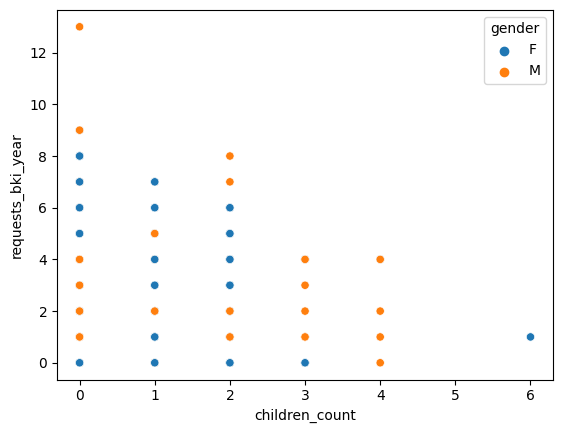

In [570]:
pred_gabung_df.drop(pred_gabung_df.filter(regex='Unnamed').columns, axis=1, inplace=True)
pred_gabung_df.drop(pred_gabung_df.filter(regex='reco_bureau_id').columns, axis=1, inplace=True)
pred_gabung_df.drop(pred_gabung_df.filter(regex='reco_id_last').columns, axis=1, inplace=True)
pred_gabung_df.drop(pred_gabung_df[pred_gabung_df['gender'] == 'XNA'].index, inplace=True)
# gabung_df.drop(gabung_df[gabung_df['income'] >= 700000].index, inplace=True)
# gabung_df.drop(gabung_df[gabung_df['days_employed'] > 0].index, inplace=True)
pred_gabung_df.drop(columns=['days_employed'], inplace=True)
pred_gabung_df.drop(columns=['income'], inplace=True)

# pred_gabung_df.drop(pred_gabung_df[pred_gabung_df['requests_bki_year'] > 10].index, inplace=True)
pred_gabung_df.drop(pred_gabung_df[pred_gabung_df['children_count'] > 10].index, inplace=True)

reduced_df = remove_highly_correlated_features(pred_gabung_df)
print(pred_gabung_df.shape)
print(reduced_df.shape)


sns.scatterplot(x='children_count', y='requests_bki_year', hue='gender', data=pred_gabung_df)

In [571]:
reco_id_curr = pred_gabung_df['reco_id_curr'].copy()
pred_gabung_df.reset_index()
# pred_gabung_df.drop(columns=['reco_bureau_id'], inplace=True)
pred_gabung_df.set_index(['reco_id_curr'], inplace=True)
print(pred_gabung_df.shape)

(1000, 202)


In [572]:
merged_columns = []
for col in gabung_df.columns:
    merged_columns.append(col)
    
pred_gabung_columns = []
for col in pred_gabung_df.columns:
    pred_gabung_columns.append(col)

s = set(merged_columns)
temp3 = [x for x in pred_gabung_columns if x not in s]
print(temp3)
print((pred_gabung_df.shape))
# print(sorted(merged_columns))
# print(sorted(reduced_columns))
pred_gabung_df.drop(columns=temp3, inplace=True)
print((pred_gabung_df.shape))

[]
(1000, 202)
(1000, 202)


In [574]:
import pandas as pd
import joblib
import numpy as np

# Ambil data baru
df_predict = pred_gabung_df

# Load label encoders and scaler first
label_encoders = joblib.load('label_encoders.pkl')
scaler = joblib.load('data_scaler.pkl')

# Mengisi missing values
for col in df_predict.select_dtypes(include=['float64', 'int64']).columns:
    df_predict[col].fillna(df_predict[col].median(), inplace=True)
for col in df_predict.select_dtypes(include=['object']).columns:
    df_predict[col].fillna(df_predict[col].mode()[0], inplace=True)

# Misalkan Anda memiliki list dari semua kolom kategorikal
categorical_cols = df_predict.select_dtypes(include=['object']).columns

cols_to_drop = []  # List untuk menyimpan kolom yang harus dihapus

for col in categorical_cols:
    try:
        # print(f"Processing column: {col}")
        
        # Cari label yang belum pernah dilihat
        unseen_labels = set(df_predict[col]) - set(label_encoders[col].classes_)
        
        # Gantikan label yang belum pernah dilihat dengan NaN atau 'lainnya'
        temp_df = df_predict[col].replace(unseen_labels, np.nan)  # atau gantikan np.nan dengan 'lainnya'
        
        # Sekarang lakukan transform
        temp_transformed = label_encoders[col].transform(temp_df.fillna(temp_df.mode()[0]))
        df_predict[col] = temp_transformed  # <-- Tambahkan baris ini untuk memperbarui kolom asli dengan hasil transformasi
        # print(f"Column {col} processed successfully!")
        
    except Exception as e:
        print(f"Error encountered with column {col}: {e}")
        cols_to_drop.append(col)

# Menghapus kolom bermasalah
if cols_to_drop:
    df_predict = df_predict.drop(columns=cols_to_drop)
    print(f"Dropped columns: {', '.join(cols_to_drop)}")

# Penskalaan fitur
df_predict_scaled = scaler.transform(df_predict)

# 2. Prediksi menggunakan probabilitas
model = joblib.load('LightGBM_model.pkl')
predicted_proba = model.predict_proba(df_predict_scaled)[:, 1]

# 3. Gabungkan probabilitas prediksi dengan reco_id_curr dalam DataFrame
result_df = pd.DataFrame({
    'reco_id_curr': reco_id_curr,
    'predicted_proba': predicted_proba
})

print(result_df)

                         reco_id_curr  predicted_proba
0    38027ebd59e7c2614201a9ad29d91f33         0.092390
1    f7825cc89df0a3665baddede33a196f0         0.236994
2    73ed7df79781a75b16431fc4c9dd50e9         0.150014
3    bec10049923a0bb209a2044d06a96e86         0.348201
4    8095e640b1088676e43264eb470b4806         0.439012
..                                ...              ...
995  a613d20807ab1699d07446e7925e1d1e         0.546795
996  4d10b7b0ff7f5d4654c0a6d25661a19f         0.214826
997  b2c36586339db9b42f1f140ee10c1dee         0.590819
998  0de9581c9037f50a115908a386d859fd         0.225750
999  7a80d7cd89b7e5378e29ea8d624c392f         0.162551

[1000 rows x 2 columns]


In [31]:
import pandas as pd
import joblib
import numpy as np
from keras.models import load_model  # Import ini

# Ambil data baru
df_predict = pred_gabung_df.copy()

# Load label encoders and scaler first
label_encoders = joblib.load('label_encoders.pkl')
scaler = joblib.load('data_scaler.pkl')

# Mengisi missing values
for col in df_predict.select_dtypes(include=['float64', 'int64']).columns:
    df_predict[col].fillna(df_predict[col].median(), inplace=True)
for col in df_predict.select_dtypes(include=['object']).columns:
    df_predict[col].fillna(df_predict[col].mode()[0], inplace=True)

# Misalkan Anda memiliki list dari semua kolom kategorikal
categorical_cols = df_predict.select_dtypes(include=['object']).columns

cols_to_drop = []

for col in categorical_cols:
    try:
        unseen_labels = set(df_predict[col]) - set(label_encoders[col].classes_)
        temp_df = df_predict[col].replace(unseen_labels, np.nan)
        temp_transformed = label_encoders[col].transform(temp_df.fillna(temp_df.mode()[0]))
        df_predict[col] = temp_transformed
    except Exception as e:
        print(f"Error encountered with column {col}: {e}")
        cols_to_drop.append(col)

if cols_to_drop:
    df_predict = df_predict.drop(columns=cols_to_drop)
    print(f"Dropped columns: {', '.join(cols_to_drop)}")

# Penskalaan fitur
df_predict_scaled = scaler.transform(df_predict)

# Load model dengan metode yang benar
model = load_model('neural_network_model_100.h5')

# Prediksi menggunakan probabilitas
predicted_proba = model.predict(df_predict_scaled)[:, 0]

# Pastikan 'reco_id_curr' ada dengan jumlah yang sama dengan predicted_proba
if len(reco_id_curr) != len(predicted_proba):
    print(f"Length mismatch! reco_id_curr: {len(reco_id_curr)}, predicted_proba: {len(predicted_proba)}")

# Gabungkan probabilitas prediksi dengan reco_id_curr dalam DataFrame
result_df = pd.DataFrame({
    'reco_id_curr': reco_id_curr,
    'predicted_proba': predicted_proba
})

print(result_df.shape)

32/32 [==============================] - 0s 514us/step
(1000, 2)


In [575]:
# Baca example_df dari file CSV dan hanya ambil kolom reco_id_curr dan urut
example_df = pd.read_csv('./example_submission.csv', usecols=['reco_id_curr', 'urut'], sep=';')

# Rename kolom predicted_proba menjadi target pada df
result_df.rename(columns={'predicted_proba': 'target'}, inplace=True)

# Lakukan inner join antara df dan example_df berdasarkan kolom reco_id_curr
merged_df = pd.merge(result_df, example_df, on='reco_id_curr', how='inner')

# Urutkan merged_df berdasarkan kolom urut
merged_df.sort_values(by='urut', inplace=True)

current_time = datetime.now().strftime('%Y_%m_%d_%H_%M')
filename = f"output_{current_time}.csv"
# Simpan DataFrame ke file CSV dengan hanya mengambil kolom reco_id_curr dan target
merged_df[['reco_id_curr', 'target']].to_csv(filename, index=False, sep=',')

print(f"CSV file telah dibuat! {filename}")

CSV file telah dibuat! output_2023_09_30_14_17.csv


In [ ]:
import pkg_resources

installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])
for m in installed_packages_list:
    print(m)